# Twitter with twarc
A UCSB Carpentry workshop

In [55]:
# administravia
# upon re-start we need to install twarc2 extensions
! pip install twarc-csv
! pip install emoji


# nltk.download('stopwords')
#this one throws an error. it needs to come later.

# Episode 2
You should have a taxday.jsonl file

In [43]:
# BASH commands start with a BANG!
!twarc2 --help

Usage: twarc2 [OPTIONS] COMMAND [ARGS]...

  Collect data from the Twitter V2 API.

Options:
  --consumer-key TEXT         Twitter app consumer key (aka "App Key")
  --consumer-secret TEXT      Twitter app consumer secret (aka "App Secret")
  --access-token TEXT         Twitter app access token for user
                              authentication.
  --access-token-secret TEXT  Twitter app access token secret for user
                              authentication.
  --bearer-token TEXT         Twitter app access bearer token.
  --app-auth / --user-auth    Use application authentication or user
                              authentication. Some rate limits are higher with
                              user authentication, but not all endpoints are
                              supported.  [default: app-auth]
  -l, --log TEXT
  --verbose
  --metadata / --no-metadata  Include/don't include metadata about when and
                              how data was collected.  [default: metadata]
  

In [57]:
#  what libraries will we need to be loading in our notebook?
#  we need to always distinguish between 
#  running BASH vs. running a line of python.

import pandas
import twarc_csv
import textblob
import nltk
import os
import emoji

In [114]:
# and of course, it's important to know where we are working
# I can send a BASH command from my notebook with a !:
!pwd

/home/jovyan/twarc_run


In [5]:
# you can also do this with Python
os.getcwd()

'/home/jovyan/twarc_run'

In [3]:
# make sure we are in the twarc_run folder
os.chdir("twarc_run")

FileNotFoundError: [Errno 2] No such file or directory: 'twarc_run'

In [117]:
os.getcwd()

'/home/jovyan/twarc_run'

## Running twarc
Let's get the timeline of one of twarc's creators.

In [ ]:
!twarc2 timeline BergisJules > raw_data/bjules.jsonl

In [6]:
# timeline objects need to be flattened in order to be analyzed as tweets
!twarc2 flatten raw_data/bjules.jsonl output_data/bjules_flat.jsonl

100%|██████████████| Processed 8.95M/8.95M of input file [00:00<00:00, 10.7MB/s]


### Challenge 1
- Can you find the file called “bjules_flat.jsonl”?
- What's the timestamp on the first one. The last one?

- How many tweets did you get from Bergis? (we can't tell without flattening)
- Download a timeline for a person of your choice. How many tweets did you get? 
- What’s the oldest one?

In [7]:
!twarc2 flatten raw_data/ecodatasci.jsonl > output_data/ecodatasci_flat.jsonl
!wc output_data/ecodatasci_flat.jsonl

    473  204893 2875654 output_data/ecodatasci_flat.jsonl


## Convert to csv

In [8]:
!twarc2 csv raw_data/bjules.jsonl output_data/bjules.csv

100%|██████████████| Processed 8.95M/8.95M of input file [00:02<00:00, 3.60MB/s]

ℹ️
Parsed 3140 tweets objects from 33 lines in the input file.
Wrote 3140 rows and output 74 columns in the CSV.



### Challenge 2

In [9]:
# commented line is a solution to challenge 1
# !twarc2 timeline ecodatasci > raw_data/ecodatasci.jsonl

!twarc2 csv output_data/ecodatasci_flat.jsonl > output_data/ecodatasci.csv 
ecodatasci_df = pandas.read_csv("output_data/ecodatasci.csv")


In [10]:
!twarc2 flatten raw_data/ecodatasci.jsonl > output_data/ecodatasci_flat.jsonl
!twarc2 csv output_data/ecodatasci_flat.jsonl > output_data/ecodatasci.csv

# Episode 3: examining tweets
What comes along with a tweet
- Look at one_tweet in Jupyter viewer
- Look at one_tweet with nano
- Look at tweet as csv
- Look at all the entities of a tweet

In [11]:
### Let's look at a tweet as a csv:
!twarc2 csv raw_data/one_tweet.jsonl output_data/one_tweet.csv
# this isn't running

100%|████████████████| Processed 299k/299k of input file [00:00<00:00, 6.48MB/s]

ℹ️
Parsed 0 tweets objects from 35 lines in the input file.
34 failed to parse. See twarc.log for details.
Wrote 0 rows and output 74 columns in the CSV.



## To flatten or not flatten

### Make your jsonl 1 tweet per line
This will let you do our most basic unix-y analysis

In [13]:
!wc raw_data/taxday.jsonl

    15698   7653538 100048736 raw_data/taxday.jsonl


### Try again
33 lines doesn't mean 33 tweets. I suspected there was more there becauce
I got an error message about hitting a limit of 3200. 

We need to either flatten our tweets, or convert them
to a csv


In [16]:
# flatten
!twarc2 flatten raw_data/taxday.jsonl output_data/taxday_flat.jsonl

100%|██████████████| Processed 95.4M/95.4M of input file [00:04<00:00, 24.5MB/s]


In [17]:
!wc output_data/taxday_flat.jsonl

    15698   7653538 100048736 output_data/taxday_flat.jsonl


## When we look at bjules, we really do need to flatten it.

In [18]:
# convert
!twarc2 csv raw_data/bjules.jsonl output_data/bjules.csv

100%|██████████████| Processed 8.95M/8.95M of input file [00:02<00:00, 3.71MB/s]

ℹ️
Parsed 3140 tweets objects from 33 lines in the input file.
Wrote 3140 rows and output 74 columns in the CSV.



In [20]:
# When I did this, I got 3166 tweets (as opposed to the 33 lines that the original file was)
! wc output_data/bjules_flattened.jsonl
! wc output_data/bjules.csv

wc: output_data/bjules_flattened.jsonl: No such file or directory
    3141   578566 11534972 output_data/bjules.csv


The csv is 1 line longer because it has column headers.

Can we go back further on his timeline by looking
only for Bergis's original content?

No--the same limit applies.

In [21]:
!twarc2 timeline BergisJules --exclude-retweets --exclude-replies > raw_data/bjules_original

API limit of 3200 reached:   0%|             | 47/17680 [00:00<03:54, 75.05it/s]


Let's look at out taxday.jsonl file that we prepared for you on April 18.

In [ ]:
!head -n 1 raw_data/taxday.jsonl

In [23]:
!twarc2 flatten raw_data/bjules_original.jsonl output_data/bjules_original_flat.jsonl


Usage: twarc2 flatten [OPTIONS] [INFILE] [OUTFILE]
Try 'twarc2 flatten --help' for help.

Error: Invalid value for '[INFILE]': 'raw_data/bjules_original.jsonl': No such file or directory


In [ ]:
# A lot comes along! 
!tail -n 1 raw_data/taxday.jsonl

## Challenge: tax day Tweets

In [26]:
# we harvested 3 hours worth of tweets for you on tax day.
# how many tweets?
!wc raw_data/taxday.jsonl
!wc output_data/taxday_flat.jsonl
# same number, so we don't have to flatten these.

    15698   7653538 100048736 raw_data/taxday.jsonl
    15698   7653538 100048736 output_data/taxday_flat.jsonl


## Next harvest
Next we'll get just Bergis' original content. 
In other words, only the tweets that he wrote, not
any retweets or replied to other people tweets.

In [ ]:
# maybe the last challenge for ep. 3 is examining this shorter file?

# Episode 4

In [175]:
# phrase searching????
!twarc2 counts --granularity "day" --text "(#UCSB OR UCSB OR ucsb OR "UC Santa Barbara")"
!twarc2 counts --granularity "day" --text "([uc santa barbara])"
!twarc2 counts --granularity "day" --text "(#ucsb)"
!twarc2 counts --granularity "day" --text "(UCSB)"

Usage: twarc2 counts [OPTIONS] QUERY [OUTFILE]
Try 'twarc2 counts --help' for help.

Error: Got unexpected extra argument (Barbara))
⚡ There were errors processing your request: no viable alternative at input '[' (at position 2)
2022-05-09T23:13:17.000Z - 2022-05-10T00:00:00.000Z: 0
2022-05-10T00:00:00.000Z - 2022-05-11T00:00:00.000Z: 11
2022-05-11T00:00:00.000Z - 2022-05-12T00:00:00.000Z: 7
2022-05-12T00:00:00.000Z - 2022-05-13T00:00:00.000Z: 11
2022-05-13T00:00:00.000Z - 2022-05-14T00:00:00.000Z: 9
2022-05-14T00:00:00.000Z - 2022-05-15T00:00:00.000Z: 7
2022-05-15T00:00:00.000Z - 2022-05-16T00:00:00.000Z: 5
2022-05-16T00:00:00.000Z - 2022-05-16T23:13:17.000Z: 12

Total Tweets: 62

2022-05-09T23:13:19.000Z - 2022-05-10T00:00:00.000Z: 12
2022-05-10T00:00:00.000Z - 2022-05-11T00:00:00.000Z: 265
2022-05-11T00:00:00.000Z - 2022-05-12T00:00:00.000Z: 370
2022-05-12T00:00:00.000Z - 2022-05-13T00:00:00.000Z: 285
2022-05-13T00:00:00.000Z - 2022-05-14T00:00:00.000Z: 257
2022-05-14T00:00:00.000Z 

In [ ]:
# search for hashtags when you really want hashtags. 
# search for a string returns both text and hashtage (an OR)
# NOT case sensitive
!twarc2 counts --granularity "day" --text "(#UCSB OR UCSB OR ucsb)"
!twarc2 counts --granularity "day" --text "(#ucsb)"
!twarc2 counts --granularity "day" --text "(UCSB)"

In [ ]:
## Endpoints: counts
!twarc2 counts --text "(Poker OR poker)" --granularity "day"
!twarc2 counts --text "(Golf OR golf)" --granularity "day"
!twarc2 counts --text "(Basketball OR basketball)" --granularity "day"
!twarc2 counts --text "(Baseball OR baseball)" --granularity "day"
!twarc2 counts --text "(Football OR football)" --granularity "day"

In [ ]:
## What's a lot?
!twarc2 counts --text "dog" --granularity "day"
!twarc2 counts --text "cat" --granularity "day"
!twarc2 counts --text "amazon" --granularity "day"
!twarc2 counts --text "right" --granularity "day"
!twarc2 counts --text "good" --granularity "day"


In [153]:
# recent search with granularity.
!twarc2 counts --granularity "day" --text "(#UCSBLibrary OR UCSBLibrary OR ucsblibrary OR #ucsblibrary OR davidsonlibrary OR #davidsonlibrary)"

2022-05-09T22:52:53.000Z - 2022-05-10T00:00:00.000Z: 0
2022-05-10T00:00:00.000Z - 2022-05-11T00:00:00.000Z: 2
2022-05-11T00:00:00.000Z - 2022-05-12T00:00:00.000Z: 2
2022-05-12T00:00:00.000Z - 2022-05-13T00:00:00.000Z: 0
2022-05-13T00:00:00.000Z - 2022-05-14T00:00:00.000Z: 2
2022-05-14T00:00:00.000Z - 2022-05-15T00:00:00.000Z: 0
2022-05-15T00:00:00.000Z - 2022-05-16T00:00:00.000Z: 0
2022-05-16T00:00:00.000Z - 2022-05-16T22:52:53.000Z: 1

Total Tweets: 7



In [28]:
## a SFW timeline
!twarc2 timeline ucsblibrary raw_data/library.jsonl
!twarc2 flatten raw_data/library.jsonl output_data/library.jsonl
!twarc2 csv output_data/library.jsonl output_data/library.csv
library_df = pandas.read_csv("output_data/library.csv")

API limit of 3200 reached:  98%|██████████▊| 3226/3278 [00:24<00:00, 130.26it/s]
100%|██████████████| Processed 5.30M/5.30M of input file [00:00<00:00, 10.9MB/s]
100%|██████████████| Processed 12.9M/12.9M of input file [00:02<00:00, 4.86MB/s]

ℹ️
Parsed 3226 tweets objects from 3226 lines in the input file.
Wrote 3226 rows and output 74 columns in the CSV.



In [ ]:
# confirm the dataframe's existance
list(library_df.columns)

### Converting to csv and dataframes

In [ ]:
!twarc2 csv raw_data/taxday.jsonl output_data/taxday.csv

In [ ]:
# fishing around for good searches
!twarc2 counts --text "kittens"

## final challenge: Cats of Instagram
Let’s make a bigger datafile. Harvest 5000 tweets that use the hashtag “catsofinstagram” and put the dataset through the pipeline to answer the following questions:

- Did you get exactly 5000?
- How far back in time did you get?
- What is the most re-tweeted recent tweet on #catsofinstagram?
- Which person has the most number of followers in your dataset?
- Is it really a person?

In [46]:
!twarc2 search --limit 5000 "#catsofinstagram" raw_data/hashtagcats.jsonl
!twarc2 csv raw_data/hashtagcats.jsonl > output_data/hashtagcats.csv
hashtagcats_df = pandas.read_csv("output_data/hashtagcats.csv")
! wc output_data/hashtagcats.csv
hashtagcats_df["created_at"].head()

Set --limit of 5000 reached:  35%|▎| Processed 2 days/6 days [00:45<01:23, 5089 
    5090  1075715 19340796 output_data/hashtagcats.csv


0    2022-05-20T01:13:20.000Z
1    2022-05-20T01:13:08.000Z
2    2022-05-20T01:12:52.000Z
3    2022-05-20T01:12:49.000Z
4    2022-05-20T01:10:45.000Z
Name: created_at, dtype: object

In [47]:
hashtagcats_df["created_at"].tail()

5084    2022-05-17T13:16:20.000Z
5085    2022-05-17T13:16:15.000Z
5086    2022-05-17T13:13:48.000Z
5087    2022-05-17T13:12:47.000Z
5088    2022-05-17T13:12:39.000Z
Name: created_at, dtype: object

In [ ]:
hashtagcats_df

In [ ]:
list(hashtagcats_df.columns)

# Episode 5: Ethics & Twitter

In [ ]:
# our first full-text analysis
# a list of words with TextBlob

# first we need to munge the data. remember from:
# list(library_df.columns)
# the tweet is library_df['text']

# TextBlob has its own data format.

# break tweets test column into a list, 
# then .join into one long string 
library_string = ' '.join(library_df['text'].tolist())
# turn the string into a blob
library_blob = TextBlob(library_string)

This produces a mess. we need to filter out the hyperlinks and stop words. And how about a phrase counter?

In [149]:
library_freq = library_blob.word_counts
library_sorted_freq = sorted(library_freq.items(), 
                             key = lambda kv: kv[1], 
                             reverse = True)

In [ ]:
# can I just do the first bunch?
type(library_sorted_freq)

In [ ]:
library_sorted_freq[1:25]

We can at least get the english stopwords out. but this all didn't reall produce anything cleaner:

In [ ]:
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

In [ ]:
library_str_stopped = [word for word in library_string.split() 
                       if word.lower() not in sw_nltk]
stopped_text = " ".join(library_str_stopped)

In [ ]:
library_blob_stopped = TextBlob(stopped_text)
library_blob_stopped_freq = library_blob_stopped.word_counts
library_blob_stopped_sorted_freq = sorted(library_blob_stopped_freq.items(), 
                             key = lambda kv: kv[1], 
                             reverse = True)
library_blob_stopped_sorted_freq

In [ ]:
library_stopped_blob = [word for word in library_blob.split()
                        if word.lower() not in sw_nltk]
new_text = " ".join(library_stopped_blob)

In [ ]:
type(library_stopped_blob)

In [ ]:
# Challenge: for the Python wizzes.
# do that in a tidy way?
# what do pandas pipes look like?

## Challenge: Insta-rrectionists

In [151]:
!twarc2 hydrate raw_data/dehydratedCapitolRiotTweets.txt output_data/riots.jsonl

 94%|█████▋| Processed 77401/82309 lines of input file [32:37<00:38, 127.80it/s]^C
 94%|██████▌| Processed 77500/82309 lines of input file [32:37<02:01, 39.58it/s]

Aborted!


In [ ]:
riots_dehydrated_df = pandas.read_csv("raw_data/dehydratedCapitolRiotTweets.txt"

# Episode 6: Working with our Tweets

1. retweets
1. emojis
1. wall
1. followers
1. retweeted-by

In [34]:
# what does this do?
# it shows the tweet ID's of the Retweets in your dataset, and how much
!python utils/retweets.py raw_data/taxday.jsonl > output_data/taxday_retweets.csv

In [58]:
!python utils/emojis.py raw_data/taxday.jsonl > output_data/taxday_emojis.csv

/home/jovyan/twarc_run/utils/emojis.py:22: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  EMOJI_RE = emoji.get_emoji_regexp()


In [ ]:
# we made the utils folder during setup
# https://github.com/DocNow/twarc/tree/main/utils

!python utils/wall.py raw_data/taxday.jsonl > output_data/taxday_wall.html

In [52]:
# ! twarc2 mentions ucsblibrary raw_data/ucsblibrary_mentions.jsonl
! twarc2 csv raw_data/ucsblibrary_mentions.jsonl output_data/ucsblibrary_mentions.csv 
ucsb_library_mentions_df = pandas.read_csv('output_data/ucsblibrary_mentions.csv')

100%|██████████████| Processed 2.41M/2.41M of input file [00:00<00:00, 3.09MB/s]

ℹ️
Parsed 809 tweets objects from 9 lines in the input file.
Wrote 809 rows and output 74 columns in the CSV.



In [60]:
# emojis for each of our datasets so far
# !python utils/emojis.py raw_data/hashtagcats.jsonl > output_data/hashtagcats_emojis.csv
!python utils/emojis.py raw_data/ucsblibrary_mentions.jsonl > output_data/ucsblibrary_mentions_emojis.csv

/home/jovyan/twarc_run/utils/emojis.py:22: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  EMOJI_RE = emoji.get_emoji_regexp()
Traceback (most recent call last):
  File "/home/jovyan/twarc_run/utils/emojis.py", line 29, in <module>
    text = tweet["text"]
KeyError: 'text'


# Retweets vs. tweets
How much original content is there?
Do this for both taxday, library, and one of the cats.

In [ ]:
# with the util

<AxesSubplot:ylabel='Frequency'>

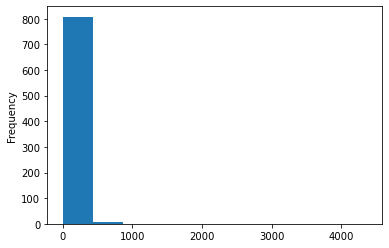

In [49]:
# via pandas and plottting
tax_retweets_df = pandas.read_csv("output_data/taxday_retweets.csv", names=["tweetid", "retweets"])
tax_retweets_df.head()
tax_retweets_df["retweets"].plot(kind = "hist")


In [50]:
retweet_total = sum(tax_retweets_df["retweets"])


In [ ]:
tax_retweets_df["retweets"].plot(kind = "hist", loglog=True)

In [ ]:
# new beginning
# can I get a fresh filter and run emojis?
!twarc2 filter 

# Episode 7: Search and Filter

In [ ]:
# use Twitter advanced search syntax (everthing in quotes!)
# to get tailored results
!twarc2 search --limit 800 "(cute OR fluffy OR haircut) (#catsofinstagram) lang:en" kittens.jsonl

In [ ]:
kittens_df = pandas.read_csv("output_data/kittens.csv")

In [ ]:
kittens_df

In [ ]:
list(kittens_df.columns)

In [ ]:
# Episode 8: Analysis Tools

In [ ]:
built-in should come first

In [ ]:
# TextBlob needs a string, so this won't work.
TextBlob(kittens_df).sentiment

### Sentiment Analysis
To do this, we need to do a little Python

TextBlob is a text processing library that does sentiment analysis. 
The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

Before we use TextBlob for sentiment analysis, we need to download
datasets of words and their associated weights. These are called *corpora*.

In [ ]:
!python -m textblob.download_corpora

In [ ]:
# break tweets test column into a list, then .join into one long string 
kittens_string = ' '.join(kittens_df['text'].tolist())
# turn the string into a blob
kittens_blob = TextBlob(kittens_string)
# get the sentiment
kittens_blob.sentiment

The overall sentiment of the language of our kittens tweets is rather positive.
And the tweets tend to be subjective.

In [ ]:
# What do you think the sentiment of tax day might be?
# get the overall sentiment and see if it matches your prediction.

In [ ]:
# Episode 9: Data Management

In [ ]:
# Episode 10: Don't Map Twitter

## Create a blob for analysis